In [6]:

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff



In [21]:
"{:.2%}".format(len(pd.json_normalize(fetch_team_schedule_json().get("games", [])).query("gameType == 2 and gameState == 'OFF'"))/82)

'40.24%'

In [26]:
print("Number of Habs games remaining this season per opponent:")

(pd.json_normalize(fetch_team_schedule_json("Canadiens").get('games', []))
 .query("gameType == 2 and gameState == 'FUT'")[['homeTeam.abbrev', 'awayTeam.abbrev']]
 .melt(value_vars=['homeTeam.abbrev', 'awayTeam.abbrev'], var_name='variable', value_name='team')
 .query("team != 'MTL'")
 .drop(columns=['variable'])
 .team.value_counts()
 .reset_index()
 .set_index('team')
 .style.background_gradient(cmap='Blues', subset=['count']))

Number of Habs games remaining this season per opponent:


,count
team,
CAR,3
FLA,3
TBL,3
PHI,3
OTT,3
NYR,3
TOR,2
BUF,2
DET,2


In [7]:
pd.json_normalize(fetch_standings().get("standings", []))

,conferenceAbbrev,conferenceHomeSequence,conferenceL10Sequence,conferenceName,conferenceRoadSequence,conferenceSequence,date,divisionAbbrev,divisionHomeSequence,divisionL10Sequence,divisionName,divisionRoadSequence,divisionSequence,gameTypeId,gamesPlayed,goalDifferential,goalDifferentialPctg,goalAgainst,goalFor,goalsForPctg,homeGamesPlayed,homeGoalDifferential,homeGoalsAgainst,homeGoalsFor,homeLosses,homeOtLosses,homePoints,homeRegulationPlusOtWins,homeRegulationWins,homeTies,homeWins,l10GamesPlayed,l10GoalDifferential,l10GoalsAgainst,l10GoalsFor,l10Losses,l10OtLosses,l10Points,l10RegulationPlusOtWins,l10RegulationWins,l10Ties,l10Wins,leagueHomeSequence,leagueL10Sequence,leagueRoadSequence,leagueSequence,losses,otLosses,pointPctg,points,regulationPlusOtWinPctg,regulationPlusOtWins,regulationWinPctg,regulationWins,roadGamesPlayed,roadGoalDifferential,roadGoalsAgainst,roadGoalsFor,roadLosses,roadOtLosses,roadPoints,roadRegulationPlusOtWins,roadRegulationWins,roadTies,roadWins,seasonId,shootoutLosses,shootoutWins,streakCode,streakCount,teamLogo,ties,waiversSequence,wildcardSequence,winPctg,wins,placeName.default,teamName.default,teamName.fr,teamCommonName.default,teamAbbrev.default,placeName.fr,teamCommonName.fr
0,W,2,2,Western,3,1,2023-12-27,P,1,1,Pacific,2,1,2,35,46,1.314286,89,135,3.857143,17,33,36,69,3,1,27,13,12,0,13,10,14,25,39,1,2,16,7,7,0,7,2,2,5,1,9,3,0.700000,49,0.657143,23,0.628571,22,18,13,53,66,6,2,22,10,10,0,10,20232024,1,0,W,1,https://assets.nhle.com/logos/nhl/svg/VAN_ligh...,0,31,0,0.657143,23,Vancouver,Vancouver Canucks,Canucks de Vancouver,Canucks,VAN,NaN,NaN
1,E,4,8,Eastern,1,1,2023-12-27,M,2,5,Metropolitan,1,1,2,32,19,0.593750,89,108,3.375000,15,9,45,54,4,0,22,10,9,0,11,10,0,34,34,4,0,12,6,4,0,6,8,16,2,2,8,1,0.734375,47,0.687500,22,0.562500,18,17,10,44,54,4,1,25,12,9,0,12,20232024,1,1,W,1,https://assets.nhle.com/logos/nhl/svg/NYR_ligh...,0,32,0,0.718750,23,NY Rangers,New York Rangers,Rangers de New York,Rangers,NYR,NaN,NaN
2,W,3,10,Western,4,2,2023-12-27,P,2,5,Pacific,3,2,2,35,26,0.742857,96,122,3.485714,17,22,39,61,3,2,26,9,8,0,12,10,3,37,40,4,1,11,4,3,0,5,3,18,7,3,9,5,0.671429,47,0.485714,17,0.428571,15,18,4,57,61,6,3,21,8,7,0,9,20232024,1,4,L,3,https://assets.nhle.com/logos/nhl/svg/VGK_ligh...,0,26,0,0.600000,21,Vegas,Vegas Golden Knights,Golden Knights de Vegas,Golden Knights,VGK,NaN,NaN
3,E,2,9,Eastern,3,2,2023-12-27,A,1,4,Atlantic,1,1,2,32,15,0.468750,85,100,3.125000,15,13,34,47,2,3,23,9,8,0,10,10,-4,30,26,3,3,11,3,2,0,4,6,19,6,4,7,6,0.687500,44,0.531250,17,0.468750,15,17,2,51,53,5,3,21,8,7,0,9,20232024,0,2,L,2,https://assets.nhle.com/logos/nhl/svg/BOS_ligh...,0,29,0,0.593750,19,Boston,Boston Bruins,Bruins de Boston,Bruins,BOS,NaN,NaN
4,W,7,7,Western,2,3,2023-12-27,C,5,4,Central,1,1,2,32,14,0.437500,100,114,3.562500,16,5,56,61,5,1,21,9,5,0,10,10,-3,38,35,3,1,13,5,3,0,6,12,12,3,5,8,4,0.687500,44,0.562500,18,0.437500,14,16,9,44,53,3,3,23,9,9,0,10,20232024,1,2,W,3,https://assets.nhle.com/logos/nhl/svg/DAL_ligh...,0,28,0,0.625000,20,Dallas,Dallas Stars,Stars de Dallas,Stars,DAL,NaN,NaN
5,W,1,8,Western,8,4,2023-12-27,C,1,5,Central,4,2,2,34,21,0.617647,104,125,3.676471,18,29,50,79,4,0,28,14,14,0,14,10,5,33,38,4,0,12,6,6,0,6,1,15,20,6,11,2,0.647059,44,0.588235,20,0.588235,20,16,-8,54,46,7,2,16,6,6,0,7,20232024,1,1,W,2,https://assets.nhle.com/logos/nhl/svg/COL_ligh...,0,25,0,0.617647,21,Colorado,Colorado Avalanche,Avalanche du Colorado,Avalanche,COL,NaN,NaN
6,W,4,1,Western,5,5,2023-12-27,C,2,1,Central,2,3,2,32,27,0.843750,82,109,3.406250,18,15,47,62,5,2,24,11,11,0,11,10,19,18,37,1,1,17,8,8,0,8,4,1,11,7,9,3,0.671875,43,0.625000,20,0.562500,18,14,12,35,47,4,1,19,9,7,0,9,20232024,1,0,W,2,https://assets.nhle.com/logos/nhl/svg/WPG_ligh...,0,27,0,0.625000,20,Winnipeg,Winnipeg Jets,Jets de Winnipeg,Jets,WPG,NaN,NaN
7,W,12,6,Western,1,6,2023-12-27,P,5,3,Pacific,1,3,2,30,34,1.133333,73,107,3.566667,15,2,45,47,6,3,15,6,6,0,6,10,6,24,30,3,1,13,5,4,0,6,27,11,1,8,7,4,0.700000,42,0.600000,18,0.566667,17,15,32,28,60,1,1,27,12,

In [8]:
def format_fetch_teams(func):
    """
    Wrapper function to format the output of fetch_teams_json.
    """
    @functools.wraps(func)
    def formatter(*args, **kwargs):
        df = pd.json_normalize(fetch_teams_json(*args, **kwargs).get("teams", []))
        df.columns = df.columns.str.replace('.', '_')
        # Continue with your code here
        return df
    
    return formatter

@format_fetch_teams
fetch_teams_json()



SyntaxError: invalid syntax (3278378984.py, line 15)

In [7]:

# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/max/Documents/Projects/max_nhl_scraper/data/pbp/pbp_2023020542.csv')

# Calculate goal differential based on 'is_home' and 'homeScore'/'awayScore'
df['goal_differential'] = np.where(df['is_home'] == 1, df['homeScore'] - df['awayScore'], df['awayScore'] - df['homeScore'])

# Set 'goal_differential' to NaN where 'eventTeam' is NaN
df.loc[df['eventTeam'].isna(), 'goal_differential'] = np.nan

# Vertical flip coordinates 
df['normalized_xCoord_v'] = df['normalized_yCoord'] * -1
df['normalized_yCoord_v'] = df['normalized_xCoord'] 
# # Initialize 'normalized_xCoord' with 'xCoord'
# df['normalized_xCoord'] = df['xCoord']

# # Update 'normalized_xCoord' based on conditions
# df.loc[(df['homeTeamDefendingSide'] == 'right') & (df['is_home'] == 1), 'normalized_xCoord'] = df['xCoord'] * -1
# df.loc[(df['homeTeamDefendingSide'] == 'left') & (df['is_home'] == 0), 'normalized_xCoord'] = df['xCoord'] * -1

# # Calculate 'normalized_yCoord' based on 'normalized_xCoord'
# df['normalized_yCoord'] = np.where(df['normalized_xCoord'] == df['xCoord'], df['yCoord'], df['yCoord'] * -1)

# # Print the resulting DataFrame
df


,period,timeInPeriod,timeRemaining,homeTeamDefendingSide,event,sortOrder,periodDescriptor_number,periodType,xCoord,yCoord,zoneCode,reason,shotType,goalieInNetId,awaySOG,homeSOG,awayScore,homeScore,secondaryReason,typeCode,descKey,duration,gameId,seasonId,gameDate,gameType,venue,elapsedTime,eventTeam,is_home,event_player1_Id,event_player2_Id,event_player3_Id,home_skaters,away_skaters,game_strength,home_skater_id1,home_skater_id2,home_skater_id3,home_skater_id4,home_skater_id5,away_skater_id1,away_skater_id2,away_skater_id3,away_skater_id4,away_skater_id5,home_skater_fullName1,home_skater_fullName2,home_skater_fullName3,home_skater_fullName4,home_skater_fullName5,away_skater_fullName1,away_skater_fullName2,away_skater_fullName3,away_skater_fullName4,away_skater_fullName5,home_goalie_id,away_goalie_id,home_goalie_fullName,away_goalie_fullName,normalized_xCoord,normalized_yCoord,goal_differential,normalized_xCoord_v,normalized_yCoord_v
0,1,00:00,20:00,right,period-start,8,1,REG,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2023020542,20232024,2023-12-28,2,PNC Arena,0,NaN,NaN,NaN,NaN,NaN,5,5,5v5,8473533.0,8477488.0,8482093.0,8476921.0,8476869.0,8476875.0,8476981.0,8475233.0,8478133.0,8477497.0,Jordan Staal,Brett Pesce,Seth Jarvis,Jordan Martinook,Brady Skjei,Mike Matheson,Josh Anderson,David Savard,Jake Evans,Sean Monahan,8477293.0,8480051.0,Antti Raanta,Cayden Primeau,NaN,NaN,NaN,NaN,NaN
1,1,00:00,20:00,right,faceoff,11,1,REG,0.0,0.0,N,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2023020542,20232024,2023-12-28,2,PNC Arena,0,MTL,0.0,8477497.0,8473533.0,NaN,5,5,5v5,8473533.0,8477488.0,8482093.0,8476921.0,8476869.0,8476875.0,8476981.0,8475233.0,8478133.0,8477497.0,Jordan Staal,Brett Pesce,Seth Jarvis,Jordan Martinook,Brady Skjei,Mike Matheson,Josh Anderson,David Savard,Jake Evans,Sean Monahan,8477293.0,8480051.0,Antti Raanta,Cayden Primeau,0.0,0.0,0.0,-0.0,0.0
2,1,00:10,19:50,right,stoppage,12,1,REG,NaN,NaN,NaN,icing,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2023020542,20232024,2023-12-28,2,PNC Arena,10,NaN,NaN,NaN,NaN,NaN,5,5,5v5,8473533.0,8477488.0,8482093.0,8476921.0,8476869.0,8476875.0,8476981.0,8475233.0,8478133.0,8477497.0,Jordan Staal,Brett Pesce,Seth Jarvis,Jordan Martinook,Brady Skjei,Mike Matheson,Josh Anderson,David Savard,Jake Evans,Sean Monahan,8477293.0,8480051.0,Antti Raanta,Cayden Primeau,NaN,NaN,NaN,NaN,NaN
3,1,00:10,19:50,right,faceoff,13,1,REG,-69.0,-22.0,O,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2023020542,20232024,2023-12-28,2,PNC Arena,10,CAR,1.0,8473533.0,8478133.0,NaN,5,5,5v5,8473533.0,8477488.0,8482093.0,8476921.0,8476869.0,8476875.0,8476981.0,8475233.0,8478133.0,8477497.0,Jordan Staal,Brett Pesce,Seth Jarvis,Jordan Martinook,Brady Skjei,Mike Matheson,Josh Anderson,David Savard,Jake Evans,Sean Monahan,8477293.0,8480051.0,Antti Raanta,Cayden Primeau,69.0,22.0,0.0,-22.0,69.0
4,1,00:27,19:33,right,hit,14,1,REG,-99.0,2.0,D,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2023020542,20232024,2023-12-28,2,PNC Arena,27,MTL,0.0,8475233.0,8476921.0,NaN,5,5,5v5,8473533.0,8477488.0,8482093.0,8476921.0,8476869.0,8476875.0,8476981.0,8475233.0,8478133.0,8477497.0,Jordan Staal,Brett Pesce,Seth Jarvis,Jordan Martinook,Brady Skjei,Mike Matheson,Josh Anderson,David Savard,Jake Evans,Sean Monahan,8477293.0,8480051.0,Antti Raanta,Cayden Primeau,-99.0,2.0,0.0,-2.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,3,19:41,00:19,right,stoppage,784,3,REG,NaN,NaN,NaN,objects-on-ice,NaN,NaN,18.0,26.0,3.0,5.0,NaN,NaN,NaN,NaN,2023020542,20232024,2023-12-28,2,PNC Arena,3581,NaN,NaN,NaN,NaN,NaN,5,5,5v5,8478970.0,8475200.0,8480835.0,8480829.0,8480039.0,8478477.0,8482087.0,8482111.0,8479543.0,8481058.0,Jalen Chatfield,Dmitry Orlov,Jack Drury,Jesperi Kotkaniemi,Martin Necas,Mitchell Stephens,Kaiden Guhle,Justin Barr

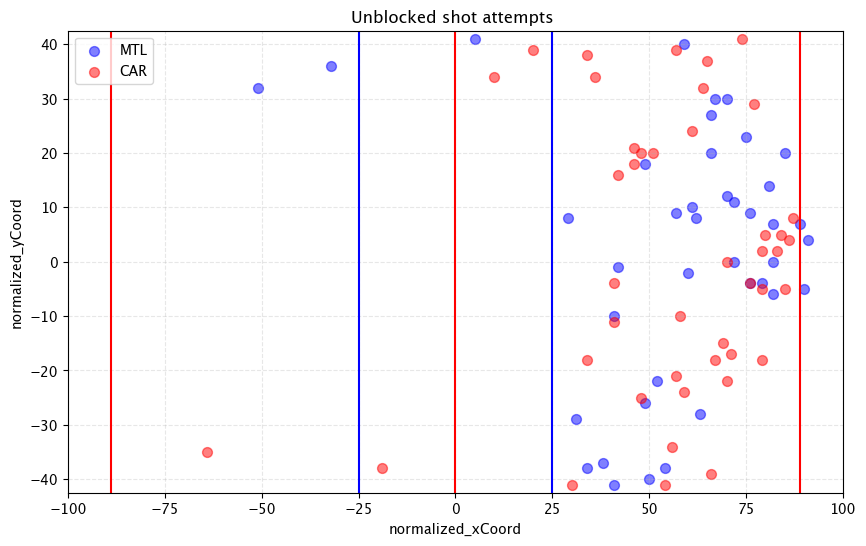

In [3]:
fenwicks = ['shot-on-goal','missed-shot', 'goal',]

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
teams = ('MTL', 'CAR')
colors = ('blue', 'red')

ax.vlines(x = 25, color='blue', ymin=-42.5, ymax=42.5)
ax.vlines(x = -25, color='blue', ymin=-42.5, ymax=42.5)
ax.vlines(x = 0, color='red', ymin=-42.5, ymax=42.5)

ax.vlines(x = 89, color='red', ymin=-42.5, ymax=42.5)
ax.vlines(x = -89, color='red', ymin=-42.5, ymax=42.5)

ax.set_xlim(-100, 100)
ax.set_ylim(-42.5, 42.5)



for team, color in zip(teams, colors):
    df[df.eventTeam.notnull()].query('eventTeam == @team and event in @fenwicks').plot.scatter(x='normalized_xCoord_v', y='normalized_yCoord_v', ax=ax, alpha=0.5, color=color, label=team, s=50)

ax.legend(loc='upper left')
ax.set_title('Unblocked shot attempts ')
ax.grid(visible=True, alpha=0.3, linestyle='--')
plt.show()
# df.query('event in @fenwicks').plot.scatter(x='normalized_xCoord', y='normalized_yCoord', figsize=(10, 6), alpha=0.5)

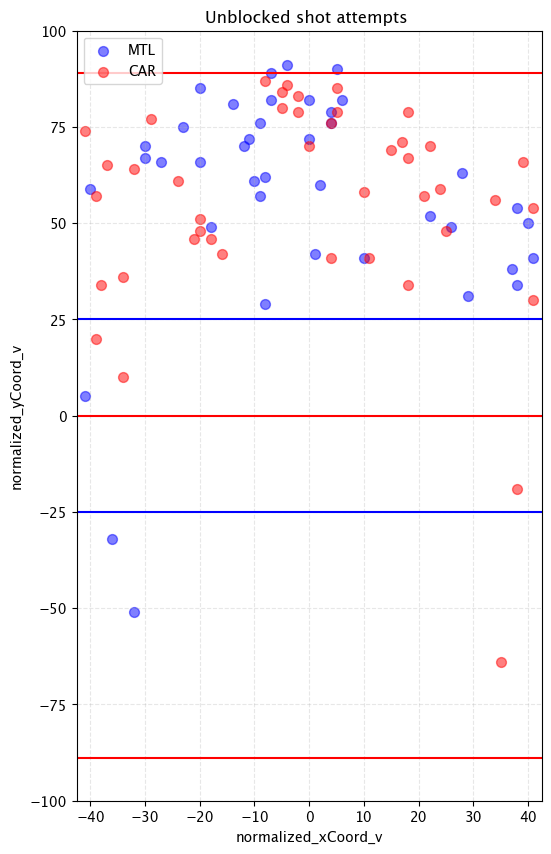

In [9]:
fenwicks = ['shot-on-goal','missed-shot', 'goal',]

# Plot the data
fig, ax = plt.subplots(figsize=(6, 10))
teams = ('MTL', 'CAR')
colors = ('blue', 'red')

ax.hlines(y = 25, color='blue', xmin=-42.5, xmax=42.5)
ax.hlines(y = -25, color='blue', xmin=-42.5, xmax=42.5)
ax.hlines(y = 0, color='red', xmin=-42.5, xmax=42.5)

ax.hlines( y = 89, color='red', xmin=-42.5, xmax=42.5)
ax.hlines(y = -89, color='red', xmin=-42.5, xmax=42.5)

ax.set_ylim(-100, 100)
ax.set_xlim(-42.5, 42.5)



for team, color in zip(teams, colors):
    df[df.eventTeam.notnull()].query('eventTeam == @team and event in @fenwicks').plot.scatter(x='normalized_xCoord_v', y='normalized_yCoord_v', ax=ax, alpha=0.5, color=color, label=team, s=50)

ax.legend(loc='upper left')
ax.set_title('Unblocked shot attempts ')
ax.grid(visible=True, alpha=0.3, linestyle='--')
plt.show()
# df.query('event in @fenwicks').plot.scatter(x='normalized_xCoord', y='normalized_yCoord', figsize=(10, 6), alpha=0.5)

# Import the play by plays

In [9]:
import os
# Define the directory path where your pickle files are located
directory_path = '/Users/max/Documents/Projects/max_nhl_scraper/data/pbp'

# Initialize an empty list to store the DataFrames from each pickle file
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.pkl'):  # Check if the file is a pickle file
        file_path = os.path.join(directory_path, filename)
        
        # Read the pickle file and append it to the list of DataFrames
        df = pd.read_pickle(file_path)
        dfs.append(df)

# Concatenate all DataFrames in the list into one DataFrame
pbp = pd.concat(dfs, ignore_index=True).reset_index(drop=True)

pbp.head()

,period,timeInPeriod,timeRemaining,homeTeamDefendingSide,event,sortOrder,periodDescriptor_number,periodType,xCoord,yCoord,zoneCode,shotType,goalieInNetId,awaySOG,homeSOG,reason,awayScore,homeScore,typeCode,descKey,duration,secondaryReason,servedByPlayerId,gameId,seasonId,gameDate,gameType,venue,elapsedTime,eventTeam,is_home,event_player1_Id,event_player2_Id,event_player3_Id,home_skaters,away_skaters,game_strength,home_skater_id1,home_skater_id2,home_skater_id3,home_skater_id4,home_skater_id5,home_skater_id6,away_skater_id1,away_skater_id2,away_skater_id3,away_skater_id4,away_skater_id5,away_skater_id6,home_skater_fullName1,home_skater_fullName2,home_skater_fullName3,home_skater_fullName4,home_skater_fullName5,home_skater_fullName6,away_skater_fullName1,away_skater_fullName2,away_skater_fullName3,away_skater_fullName4,away_skater_fullName5,away_skater_fullName6,home_goalie_id,away_goalie_id,home_goalie_fullName,away_goalie_fullName,normalized_xCoord,normalized_yCoord
0,1,00:00,20:00,right,period-start,10,1,REG,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020466,20232024,2023-12-16,2,Scotiabank Arena,0,NaN,NaN,NaN,NaN,NaN,5,5,5v5,8479393.0,8475714.0,8480043.0,8476853.0,8480144.0,NaN,8482055.0,8477435.0,8471724.0,8477404.0,8471675.0,NaN,Noah Gregor,Calle Jarnkrok,Timothy Liljegren,Morgan Rielly,David Kampf,NaN,Drew O'Connor,Ryan Graves,Kris Letang,Jake Guentzel,Sidney Crosby,NaN,8474889.0,8477465.0,Martin Jones,Tristan Jarry,NaN,NaN
1,1,00:00,20:00,right,faceoff,11,1,REG,0.0,0.0,N,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020466,20232024,2023-12-16,2,Scotiabank Arena,0,PIT,0.0,8471675.0,8480144.0,NaN,5,5,5v5,8479393.0,8475714.0,8480043.0,8476853.0,8480144.0,NaN,8482055.0,8477435.0,8471724.0,8477404.0,8471675.0,NaN,Noah Gregor,Calle Jarnkrok,Timothy Liljegren,Morgan Rielly,David Kampf,NaN,Drew O'Connor,Ryan Graves,Kris Letang,Jake Guentzel,Sidney Crosby,NaN,8474889.0,8477465.0,Martin Jones,Tristan Jarry,0.0,0.0
2,1,00:21,19:39,right,blocked-shot,12,1,REG,45.0,-29.0,D,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020466,20232024,2023-12-16,2,Scotiabank Arena,21,TOR,1.0,8471724.0,8475714.0,NaN,5,5,5v5,8479393.0,8475714.0,8480043.0,8476853.0,8480144.0,NaN,8482055.0,8477435.0,8471724.0,8477404.0,8471675.0,NaN,Noah Gregor,Calle Jarnkrok,Timothy Liljegren,Morgan Rielly,David Kampf,NaN,Drew O'Connor,Ryan Graves,Kris Letang,Jake Guentzel,Sidney Crosby,NaN,8474889.0,8477465.0,Martin Jones,Tristan Jarry,-45.0,29.0
3,1,00:52,19:08,right,shot-on-goal,21,1,REG,-70.0,15.0,O,wrist,8477465.0,0.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020466,20232024,2023-12-16,2,Scotiabank Arena,52,TOR,1.0,8475166.0,NaN,NaN,5,5,5v5,8476931.0,8477479.0,8478021.0,8477939.0,8475166.0,NaN,8475191.0,8477969.0,8481703.0,8474578.0,8471215.0,NaN,Jake McCabe,Tyler Bertuzzi,William Lagesson,William Nylander,John Tavares,NaN,Reilly Smith,Marcus Pettersson,Valtteri Puustinen,Erik Karlsson,Evgeni Malkin,NaN,8474889.0,8477465.0,Martin Jones,Tristan Jarry,70.0,-15.0
4,1,00:53,19:07,right,shot-on-goal,22,1,REG,-86.0,4.0,O,snap,8477465.0,0.0,2.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020466,20232024,2023-12-16,2,Scotiabank Arena,53,TOR,1.0,8475166.0,NaN,NaN,5,5,5v5,8476931.0,8477479.0,8478021.0,8477939.0,8475166.0,NaN,8475191.0,8477969.0,8481703.0,8474578.0,8471215.0,NaN,Jake McCabe,Tyler Bertuzzi,William Lagesson,William Nylander,John Tavares,NaN,Reilly Smith,Marcus Pettersson,Valtteri Puustinen,Erik Karlsson,Evgeni Malkin,NaN,8474889.0,8477465.0,Martin Jones,Tristan Jarry,86.0,-4.0


In [7]:
# import os
# Define the directory path where your pickle files are located
directory_path = '/Users/max/Documents/Projects/max_nhl_scraper/data/rosters'

# Initialize an empty list to store the DataFrames from each pickle file
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.pkl'):  # Check if the file is a pickle file
        file_path = os.path.join(directory_path, filename)
        
        # Read the pickle file and append it to the list of DataFrames
        df = pd.read_pickle(file_path)
        dfs.append(df)

# Concatenate all DataFrames in the list into one DataFrame
rosters = pd.concat(dfs, ignore_index=True).reset_index(drop=True)

rosters.head()

,teamId,sweaterNumber,positionCode,headshot,firstName.cs,firstName.fi,firstName.sk,lastName.cs,lastName.sk,firstName.de,firstName.es,firstName.sv,lastName.fi,fullName,gameId,gameDate,is_home,lastName.de,lastName.sv,lastName.es
0,13,91,D,https://assets.nhle.com/mugs/nhl/20232024/FLA/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oliver Ekman-Larsson,2023020581,2024-01-02,0,NaN,NaN,NaN
1,13,7,D,https://assets.nhle.com/mugs/nhl/20232024/FLA/...,Dmitrij,Dmitri,Dmitrij,NaN,NaN,NaN,NaN,NaN,NaN,Dmitry Kulikov,2023020581,2024-01-02,0,NaN,NaN,NaN
2,13,72,G,https://assets.nhle.com/mugs/nhl/20232024/FLA/...,Sergej,NaN,Sergej,Bobrovskij,Bobrovskij,NaN,NaN,NaN,NaN,Sergei Bobrovsky,2023020581,2024-01-02,0,NaN,NaN,NaN
3,53,16,L,https://assets.nhle.com/mugs/nhl/20232024/ARI/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jason Zucker,2023020581,2024-01-02,1,NaN,NaN,NaN
4,53,17,C,https://assets.nhle.com/mugs/nhl/20232024/ARI/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nick Bjugstad,2023020581,2024-01-02,1,NaN,NaN,NaN


In [8]:
import os
# Define the directory path where your pickle files are located
directory_path = '/Users/max/Documents/Projects/max_nhl_scraper/data/shifts'

# Initialize an empty list to store the DataFrames from each pickle file
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.pkl'):  # Check if the file is a pickle file
        file_path = os.path.join(directory_path, filename)
        
        # Read the pickle file and append it to the list of DataFrames
        df = pd.read_pickle(file_path)
        dfs.append(df)

# Concatenate all DataFrames in the list into one DataFrame
shifts = pd.concat(dfs, ignore_index=True).reset_index(drop=True)

shifts.head()

,shift_number,period,duration,sweaterNumber,is_home,startTime,endTime,duration_s,startTime_s,endTime_s,gameId,gameDate,playerId,positionCode
0,1,1,00:30,3,1,0:44,1:14,30,44,74,2023020403,2023-12-07,8478840,D
1,2,1,00:39,3,1,3:24,4:03,39,204,243,2023020403,2023-12-07,8478840,D
2,3,1,00:30,3,1,7:16,7:46,30,436,466,2023020403,2023-12-07,8478840,D
3,4,1,00:30,3,1,9:09,9:39,30,549,579,2023020403,2023-12-07,8478840,D
4,5,1,00:40,3,1,11:54,12:34,40,714,754,2023020403,2023-12-07,8478840,D


In [16]:
# Vertical flip coordinates 
pbp['normalized_xCoord_v'] = pbp['normalized_yCoord'] * -1
pbp['normalized_yCoord_v'] = pbp['normalized_xCoord'] 

In [126]:
player_name = "Juraj Slafkovsky"

player_id = rosters.query('fullName == @player_name').merge(shifts[['is_home', 'sweaterNumber', 'gameId', 'playerId']].drop_duplicates(), on=['is_home', 'sweaterNumber', 'gameId']).playerId.iloc[0]

shot_data = pbp.query('event in ["shot-on-goal", "missed-shot", "goal"] and event_player1_Id == @player_id and game_strength == "5v5"')


# Plot the 
rosters.query('fullName == @player_name').merge(shifts[['is_home', 'sweaterNumber', 'gameId', 'playerId']].drop_duplicates(), on=['is_home', 'sweaterNumber', 'gameId']).sort_values("gameDate", ascending=False).head(1)


,teamId,sweaterNumber,positionCode,headshot,firstName.cs,firstName.fi,firstName.sk,lastName.cs,lastName.sk,firstName.de,firstName.es,firstName.sv,lastName.fi,fullName,gameId,gameDate,is_home,lastName.de,lastName.sv,lastName.es,playerId
29,8,20,L,https://assets.nhle.com/mugs/nhl/20232024/MTL/...,NaN,NaN,NaN,Slafkovský,Slafkovský,NaN,NaN,NaN,NaN,Juraj Slafkovsky,2023020577,2024-01-02,0,NaN,NaN,NaN,8483515


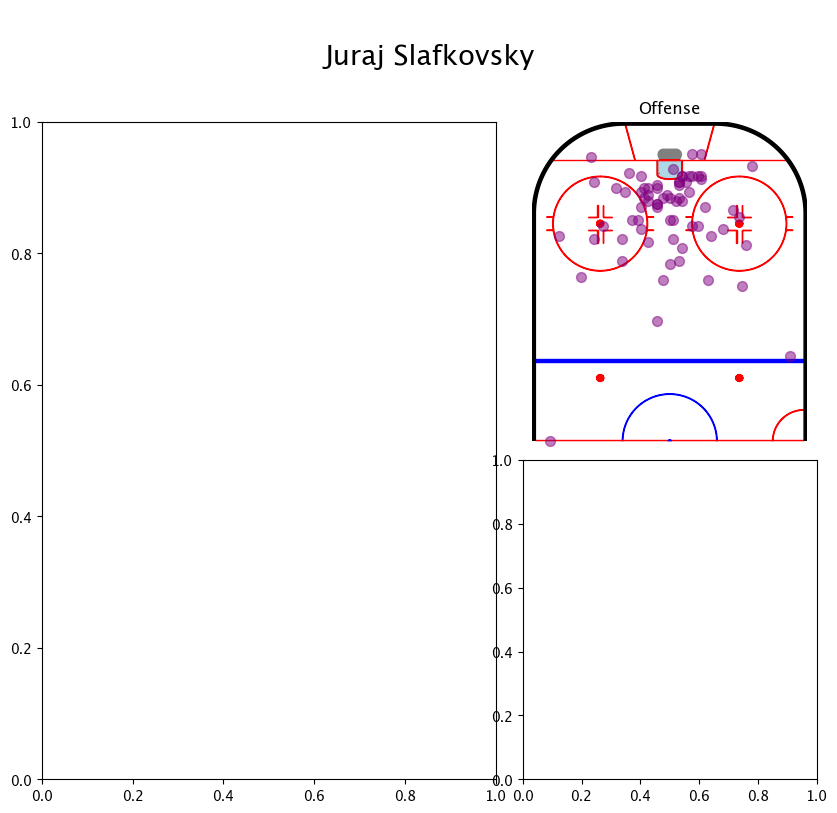

In [66]:
from hockey_rink import NHLRink
rink = NHLRink(y_shift=100, x_shift=42.5, rotation=270)

display = [['title', 'title', 'title', 'title', 'title'],
           ['rink', 'rink','rink', 'offense', 'offense'],
           ['rink', 'rink','rink', 'offense', 'offense'],
           ['rink', 'rink', 'rink', 'offense', 'offense'],
           ['rink', 'rink', 'rink', 'defense', 'defense'],
           ['rink', 'rink', 'rink', 'defense', 'defense'],
           ['rink', 'rink', 'rink', 'defense', 'defense']]

fig, ax = plt.subplot_mosaic(display, figsize=(10, 10))
ax['title'].text(0.5, 0.5, player_name, horizontalalignment='center', verticalalignment='center', fontsize=20)
ax['title'].axis('off')
rink = NHLRink(rotation=90)
rink.draw(ax=ax['offense'], display_range="offense")
rink.scatter(shot_data.normalized_xCoord, shot_data.normalized_yCoord, ax=ax['offense'], s=50, alpha=0.5, color='purple')
ax['offense'].set_title('Offense')
plt.show()






In [10]:
from highlight_text import HighlightText, ax_text, fig_text
from datetime import date, datetime
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
# from mplsoccer.pitch import Pitch
from hockey_rink import NHLRink
import urllib.request


from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

import pandas as pd
import numpy as np

from PIL import Image
import requests
from io import BytesIO

#%%
cat = ["EV Offense", "EV Defense", "PP", "PK", "Finishing",
       "G/60", "A/60", "Penalties", "Competition", "Teammates"]

np.random.seed(69)
numba = list(np.random.randint(low = 0,high=99,size=10))

df = pd.DataFrame()
df["cat"] = cat
df["numba"] = numba

infos = rosters.query('fullName == @player_name').merge(shifts[['is_home', 'sweaterNumber', 'gameId', 'playerId']].drop_duplicates(), on=['is_home', 'sweaterNumber', 'gameId']).sort_values("gameDate", ascending=False).head(1)
position_map = {"C": "CENTER", "L": "LEFT WINGER", "R": "RIGHT WINGER", "D": "DEFENSEMAN", "G": "GOALIE"}


player, num, pos = player_name, f"#{infos.sweaterNumber.iloc[0]}", position_map[infos.positionCode.iloc[0]]



# Create a colormap mapping from 0 to 100 (or any desired range)
cmap = plt.get_cmap("coolwarm_r")

# Normalize your data to the colormap range
norm = Normalize(vmin=0, vmax=100)

#df = pd.DataFrame(np.random.randint(0,100,size=(200, 2)), columns=['X', 'Y'])
fig = plt.figure(figsize=(10,10), dpi = 140)
grid = plt.GridSpec(6, 6)

a1 = fig.add_subplot(grid[1:6, 0:3])
a2 = fig.add_subplot(grid[0:1, 1:5],sharex=a1)
a3 = fig.add_subplot(grid[0:1, 0:1])
a4 = fig.add_subplot(grid[1:3, 3:5])
a5 = fig.add_subplot(grid[4:6, 3:5], sharex=a4)

#a3 = fig.add_subplot(grid[0:5, 5],sharey=a1)

a1.barh(cat, numba, align='center', zorder = 5)
ypos = np.arange(len(cat))
a1.grid(ls="dotted",lw="0.5",color="grey", zorder=1000, alpha=0.5)
bars = a1.barh(range(len(cat)), numba, color=cmap(norm(numba)), zorder=5)

# Calculate bar brightness and set label text color accordingly
bar_brightness = [0.299 * r + 0.587 * g + 0.114 * b for r, g, b, _ in cmap(norm(numba))]
label_colors = ["white" if brightness < 0.7 else "black" for brightness in bar_brightness]



label_objects = a1.bar_label(bars, padding = -5, zorder=100, fontsize=15, fontweight="bold", fontfamily="DIN Condensed")

for i, color in enumerate(bar_brightness):
    label_objects[i].set_color("white" if color < 0.7 else "black")

a1.scatter(numba, ypos, color=cmap(norm(numba)), zorder=5, s=1500, edgecolors="white", linewidths=2)

# # Add the colorbar below the bars
# cbar = fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), ax=a1, orientation='horizontal', aspect=30)
# cbar.set_label("Values (0-100)", fontsize=12, fontweight="bold")

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.4)


#a1.set_yticklabels(cat, minor=False)
#a1.set_yticks(y_pos)
a1.invert_yaxis()  # labels read top-to-bottom
a1.set_xlabel('Percentile')
a1.set_title('Individual Statistics')

a1.spines["right"].set_visible(False)
a1.spines["top"].set_visible(False)
a1.spines["left"].set_visible(False)
a1.spines["bottom"].set_visible(False)

a1.set_xlim(0,100)

rink = NHLRink(rotation=90)
rink.draw(ax=a4, display_range="offense")
a4.set_title('Offense', fontfamily="DIN Condensed", color = "purple",fontsize=20)
a4.scatter(shot_data.normalized_xCoord_v, shot_data.normalized_yCoord_v, s=10, alpha=0.5, color='purple')
# a4.scatter(list(np.random.randint(low = -42.5,high=42.5,size=100)), list(np.random.randint(low = 0,high=100,size=100)), s = 10, color = "purple")
#a4.hexbin(list(np.random.randint(low = -42.5,high=42.5,size=100)), list(np.random.randint(low = 0,high=100,size=100)), gridsize = 15, cmap = "Reds")

a5 = rink.draw(ax=a5, display_range = "defense")
a5.set_title('Defense', fontfamily="DIN Condensed", color = "green", fontsize=20)
a5.scatter(list(np.random.randint(low = -42.5,high=42.5,size=100)), list(np.random.randint(low = -100,high=0,size=100)), s = 10, color = "green")

a2.axis("off")
a2.text(10,0.5, f"{player}, {num}",fontsize=40, fontfamily="DIN Condensed", color = "darkblue")
a2.text(10,0.1, f"{pos}",fontfamily="DIN Condensed",fontsize=25, color = "darkblue")


a3.axis("off")

# Load and display the image in a3 from a remote URL
img_url = "https://assets.nhle.com/mugs/nhl/20232024/MTL/8483515.png"
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
a3.imshow(img)
a3.axis("off")  # Hide axis for the image

# path = "/Users/max/Documents/My Tableau Repository/Shapes/NHL logos/MON.svg.png"
# img = Image.open(path)
# a3.imshow(img)

# =============================================================================
# pitch = Pitch(pitch_type='opta', orientation='vertical', stripe=False)
# pitch.draw(ax=a1)
# pitch.scatter(df['X'], df['Y'],
#                     s=10, c='black', label='scatter', ax=a1)
# =============================================================================

#a2.hist(df['Y'], 3, color = 'black', histtype='stepfilled')
#a3.hist(df['X'], 9, orientation='horizontal', color='black', histtype='stepfilled')

plt.show()

UndefinedVariableError: local variable 'player_name' is not defined

In [24]:


# player_name = widgets.Dropdown(
#     options= sorted(list(rosters['fullName'].unique())),
#     value='Juraj Slafkovsky',
#     description='Player:',
# )
w1 = widgets.Dropdown(
    options= sorted(list(rosters['fullName'].unique())),
    value='Juraj Slafkovsky',
    description='Player:',
)
@interact(player_name=w1)

def player_chart(player_name = 'Juraj Slafkovsky'):



    player_id = rosters.query('fullName == @player_name').merge(shifts[['is_home', 'sweaterNumber', 'gameId', 'playerId']].drop_duplicates(), on=['is_home', 'sweaterNumber', 'gameId']).playerId.iloc[0]

    shot_data = (pbp
                 .query('event in ["shot-on-goal", "missed-shot", "goal"] and event_player1_Id == @player_id and game_strength == "5v5"')
                 .assign(normalized_xCoord_v = lambda x: x['normalized_yCoord'] * -1,
                         normalized_yCoord_v = lambda x: x['normalized_xCoord']))

    cat = ["EV Offense", "EV Defense", "PP", "PK", "Finishing",
       "G/60", "A/60", "Penalties", "Competition", "Teammates"]

    # np.random.seed(69)
    numba = list(np.random.randint(low = 0,high=99,size=10))

    df = pd.DataFrame()
    df["cat"] = cat
    df["numba"] = numba

    infos = rosters.query('fullName == @player_name').merge(shifts[['is_home', 'sweaterNumber', 'gameId', 'playerId']].drop_duplicates(), on=['is_home', 'sweaterNumber', 'gameId']).sort_values("gameDate", ascending=False).head(1)
    position_map = {"C": "CENTER", "L": "LEFT WINGER", "R": "RIGHT WINGER", "D": "DEFENSEMAN", "G": "GOALIE"}


    player, num, pos = player_name, f"#{infos.sweaterNumber.iloc[0]}", position_map[infos.positionCode.iloc[0]]
    headshot = infos.headshot.iloc[0]

    # Create a colormap mapping from 0 to 100 (or any desired range)
    cmap = plt.get_cmap("coolwarm_r")

    # Normalize your data to the colormap range
    norm = Normalize(vmin=0, vmax=100)

    #df = pd.DataFrame(np.random.randint(0,100,size=(200, 2)), columns=['X', 'Y'])
    fig = plt.figure(figsize=(10,10), dpi = 140)
    grid = plt.GridSpec(6, 6)

    a1 = fig.add_subplot(grid[1:6, 0:3])
    a2 = fig.add_subplot(grid[0:1, 1:5],sharex=a1)
    a3 = fig.add_subplot(grid[0:1, 0:1])
    a4 = fig.add_subplot(grid[1:3, 3:5])
    a5 = fig.add_subplot(grid[4:6, 3:5], sharex=a4)

    #a3 = fig.add_subplot(grid[0:5, 5],sharey=a1)

    a1.barh(cat, numba, align='center', zorder = 5)
    ypos = np.arange(len(cat))
    a1.grid(ls="dotted",lw="0.5",color="grey", zorder=1000, alpha=0.5)
    bars = a1.barh(range(len(cat)), numba, color=cmap(norm(numba)), zorder=5)

    # Calculate bar brightness and set label text color accordingly
    bar_brightness = [0.299 * r + 0.587 * g + 0.114 * b for r, g, b, _ in cmap(norm(numba))]
    label_colors = ["white" if brightness < 0.7 else "black" for brightness in bar_brightness]



    label_objects = a1.bar_label(bars, padding = -5, zorder=100, fontsize=15, fontweight="bold", fontfamily="DIN Condensed")

    for i, color in enumerate(bar_brightness):
        label_objects[i].set_color("white" if color < 0.7 else "black")

    a1.scatter(numba, ypos, color=cmap(norm(numba)), zorder=5, s=1500, edgecolors="white", linewidths=2)

    # # Add the colorbar below the bars
    # cbar = fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), ax=a1, orientation='horizontal', aspect=30)
    # cbar.set_label("Values (0-100)", fontsize=12, fontweight="bold")

    # Adjust subplot spacing
    plt.subplots_adjust(wspace=0.4)


    a1.set_xticklabels([], minor=False)
    for tick in a1.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)

    for tick in a1.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        # tick.label1.set_visible(False)
        # tick.label2.set_visible(False)
    #a1.set_yticks(y_pos)
    a1.invert_yaxis()  # labels read top-to-bottom
    a1.set_xlabel('Percentile')
    a1.set_title('Individual Statistics')

    a1.spines["right"].set_visible(False)
    a1.spines["top"].set_visible(False)
    a1.spines["left"].set_visible(False)
    a1.spines["bottom"].set_visible(False)

    a1.set_xlim(-10,105)

    rink = NHLRink(rotation=90)
    rink.draw(ax=a4, display_range="offense")
    a4.set_title('Offense', fontfamily="DIN Condensed", color = "purple",fontsize=20)
    a4.scatter(shot_data.normalized_xCoord_v, shot_data.normalized_yCoord_v, s=10, alpha=0.5, color='purple')
    # a4.scatter(list(np.random.randint(low = -42.5,high=42.5,size=100)), list(np.random.randint(low = 0,high=100,size=100)), s = 10, color = "purple")
    #a4.hexbin(list(np.random.randint(low = -42.5,high=42.5,size=100)), list(np.random.randint(low = 0,high=100,size=100)), gridsize = 15, cmap = "Reds")

    a5 = rink.draw(ax=a5, display_range = "defense")
    a5.set_title('Defense', fontfamily="DIN Condensed", color = "green", fontsize=20)
    a5.scatter(list(np.random.randint(low = -42.5,high=42.5,size=100)), list(np.random.randint(low = -100,high=0,size=100)), s = 10, color = "green")

    a2.axis("off")
    a2.text(10,0.5, f"{player}, {num}",fontsize=40, fontfamily="DIN Condensed", color = "darkblue")
    a2.text(10,0.1, f"{pos}",fontfamily="DIN Condensed",fontsize=25, color = "darkblue")


    a3.axis("off")

    # Load and display the image in a3 from a remote URL
    img_url = headshot
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    a3.imshow(img)
    a3.axis("off")  # Hide axis for the image

    # path = "/Users/max/Documents/My Tableau Repository/Shapes/NHL logos/MON.svg.png"
    # img = Image.open(path)
    # a3.imshow(img)

    # =============================================================================
    # pitch = Pitch(pitch_type='opta', orientation='vertical', stripe=False)
    # pitch.draw(ax=a1)
    # pitch.scatter(df['X'], df['Y'],
    #                     s=10, c='black', label='scatter', ax=a1)
    # =============================================================================

    #a2.hist(df['Y'], 3, color = 'black', histtype='stepfilled')
    #a3.hist(df['X'], 9, orientation='horizontal', color='black', histtype='stepfilled')

    plt.show()

# =============================================================================
#
# =============================================================================




interactive(children=(Dropdown(description='Player:', index=444, options=('A.J. Greer', 'Aaron Ekblad', 'Adam …

In [38]:
shifts



,shift_number,period,duration,sweaterNumber,is_home,startTime,endTime,duration_s,startTime_s,endTime_s,gameId,gameDate,playerId,positionCode
0,1,1,00:30,3,1,0:44,1:14,30,44,74,2023020403,2023-12-07,8478840,D
1,2,1,00:39,3,1,3:24,4:03,39,204,243,2023020403,2023-12-07,8478840,D
2,3,1,00:30,3,1,7:16,7:46,30,436,466,2023020403,2023-12-07,8478840,D
3,4,1,00:30,3,1,9:09,9:39,30,549,579,2023020403,2023-12-07,8478840,D
4,5,1,00:40,3,1,11:54,12:34,40,714,754,2023020403,2023-12-07,8478840,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436805,18,3,00:58,94,0,13:37,14:35,58,3217,3275,2023020383,2023-12-05,8482222,L
436806,19,3,00:22,94,0,16:27,16:49,22,3387,3409,2023020383,2023-12-05,8482222,L
436807,20,3,01:05,94,0,17:25,18:30,65,3445,3510,2023020383,2023-12-05,8482222,L
436808,21,3,00:41,94,0,18:55,19:36,41,3535,3576,2023020383,2023-12-05,8482222,L


In [50]:
import pandas as pd

# Assuming you have a DataFrame named 'shift_data' with columns: 'game_id', 'start_time', 'end_time', 'team', 'player_id'
shift_data = shifts.query('positionCode != "G"').copy()

# Sort the shift data by game_id and start_time
shift_data = shift_data.sort_values(by=['gameId', 'startTime_s'])

# # Create an empty DataFrame to store the results
# results = pd.DataFrame(columns=['gameId', 'second', 'home_players', 'away_players'])

# results = pd.DataFrame()

gameIds = []
seconds = []
nHomes = []
nAways = []

# Iterate through each game ID
for n, game_id in enumerate(shift_data['gameId'].unique()):

    print(f"{game_id} :Processing game {n+1} of {len(shift_data['gameId'].unique())}...")


    game_shifts = shift_data[shift_data['gameId'] == game_id]
    
    # Extract the start and end times for each shift
    start_times = game_shifts['startTime_s'].values
    end_times = game_shifts['endTime_s'].values
    
    # Create a list of unique times within the game
    unique_times = sorted(set(start_times) | set(end_times))
    
    # Iterate through each second of the game
    for second in unique_times:
        home_players = len(game_shifts[(game_shifts['is_home'] == 1) & (game_shifts['startTime_s'] <= second) & (game_shifts['endTime_s'] >= second)])
        away_players = len(game_shifts[(game_shifts['is_home'] == 0) & (game_shifts['startTime_s'] <= second) & (game_shifts['endTime_s'] >= second)])
    
        gameIds.append(game_id)
        seconds.append(second)
        nHomes.append(home_players)
        nAways.append(away_players)
        
# Creating a DataFrame with an index
data = {
    'gameId': gameIds,
    'second': seconds,
    'home_players': home_players,
    'away_players': away_players
}

index = range(len(gameIds))  # You can customize the index as needed

results = pd.DataFrame(data, index=index)

results

2023020001 :Processing game 1 of 581...
2023020002 :Processing game 2 of 581...
2023020003 :Processing game 3 of 581...
2023020004 :Processing game 4 of 581...
2023020005 :Processing game 5 of 581...
2023020006 :Processing game 6 of 581...
2023020007 :Processing game 7 of 581...
2023020008 :Processing game 8 of 581...
2023020009 :Processing game 9 of 581...
2023020010 :Processing game 10 of 581...
2023020011 :Processing game 11 of 581...
2023020012 :Processing game 12 of 581...
2023020013 :Processing game 13 of 581...
2023020014 :Processing game 14 of 581...
2023020015 :Processing game 15 of 581...
2023020016 :Processing game 16 of 581...
2023020017 :Processing game 17 of 581...
2023020018 :Processing game 18 of 581...
2023020019 :Processing game 19 of 581...
2023020020 :Processing game 20 of 581...
2023020021 :Processing game 21 of 581...
2023020022 :Processing game 22 of 581...
2023020023 :Processing game 23 of 581...
2023020024 :Processing game 24 of 581...
2023020025 :Processing ga

,gameId,second,home_players,away_players
0,2023020001,0,5,5
1,2023020001,28,5,5
2,2023020001,30,5,5
3,2023020001,32,5,5
4,2023020001,33,5,5
...,...,...,...,...
228304,2023020586,3569,5,5
228305,2023020586,3571,5,5
228306,2023020586,3573,5,5
228307,2023020586,3594,5,5


In [56]:
# Create a DataFrame with all possible 'second' values for each 'gameId'
game_ids = results['gameId'].unique()
all_seconds = pd.DataFrame({'second': range(results['second'].min(), results['second'].max() + 1)})
all_seconds['key'] = 0  # Create a common key to merge on

# Cross join (Cartesian product) between game_ids and all_seconds
game_id_seconds = pd.DataFrame({'gameId': game_ids})
game_id_seconds['key'] = 0  # Create a common key to merge on

# Merge the DataFrames to fill in missing seconds
result = pd.merge(game_id_seconds, all_seconds, on='key', how='outer').drop('key', axis=1)
result = pd.merge(result, results, on=['gameId', 'second'], how='left')

# Fill missing 'home_players' and 'away_players' values with the previous value within each group
result['home_players'] = result['home_players'].ffill()
result['away_players'] =  result['away_players'].ffill()

# Reset the index if needed
result = result.reset_index(drop=True)

result

,gameId,second,home_players,away_players
0,2023020001,0,5.0,5.0
1,2023020001,1,5.0,5.0
2,2023020001,2,5.0,5.0
3,2023020001,3,5.0,5.0
4,2023020001,4,5.0,5.0
...,...,...,...,...
2266476,2023020586,3896,5.0,5.0
2266477,2023020586,3897,5.0,5.0
2266478,2023020586,3898,5.0,5.0
2266479,2023020586,3899,5.0,5.0


In [75]:
shifts.groupby('playerId')['positionCode'].nunique().reset_index().sort_values('positionCode', ascending=False).head(10)

,playerId,positionCode
795,8482124,2
34,8473986,2
602,8480084,1
577,8480011,1
578,8480012,1
579,8480014,1
580,8480015,1
581,8480018,1
582,8480021,1
583,8480023,1


In [225]:
work_df = ((shifts
 .assign(position=lambda x: x.apply(lambda row: 'F' if row['positionCode'] not in ['D', 'G'] else row['positionCode'], axis=1)))
 .query("positionCode != 'G'")
 .groupby(['sweaterNumber', 'is_home', 'gameId', 'playerId', 'position'], as_index=False)
 .agg(shift_number_size=("shift_number", "size"),
      duration_s_sum=("duration_s", "sum"),
      duration_s_mean=("duration_s", "mean"))
 .sort_values(('duration_s_mean'), ascending=False)
 .reset_index(drop=True)  # Reset the index 
 .merge(rosters[['sweaterNumber', 'fullName', "gameId", "is_home"]], on=['sweaterNumber', "gameId", "is_home"]))
#  .merge(shots_per_shift[['playerId','gameId', 'log_shots_per_shift']], on=['playerId','gameId']))


# work_df.groupby('playerId').gameId.nunique().reset_index().sort_values('gameId', ascending=False).head(10).rename(columns={'gameId': 'games_played',
                                                                                                                                  #     'playerId': 'event_player1_Id'})
 # Group by playerId and pre-calculate metrics
grouped_pbp = pbp.groupby(['event_player1_Id', 'gameId'], as_index=False)
metrics = grouped_pbp['event'].agg([
    ('iFenwick', lambda x: x.isin(["shot-on-goal", "missed-shot", "goal"]).sum()),
    ('iCorsi', lambda x: x.isin(["shot-on-goal", "missed-shot", "goal", "blocked-shot"]).sum()),
    ('iGoals', lambda x: x.eq("goal").sum()),
    ('iShots', lambda x: x.eq("shot-on-goal").sum()),
])




In [221]:
metrics = work_df.filter(['playerId', 'gameId']).drop_duplicates().reset_index(drop=True).rename(columns={'playerId': 'event_player1_Id'})

# Group by playerId and pre-calculate metrics
grouped_pbp = pbp.groupby(['event_player1_Id', 'gameId'], as_index=False)
metrics = metrics.merge( grouped_pbp['event'].agg([
    ('iFenwick', lambda x: x.isin(["shot-on-goal", "missed-shot", "goal"]).sum()),
    ('iCorsi', lambda x: x.isin(["shot-on-goal", "missed-shot", "goal", "blocked-shot"]).sum()),
    ('iGoals', lambda x: x.eq("goal").sum()),
    ('iShots', lambda x: x.eq("shot-on-goal").sum()),
]), on=['event_player1_Id', 'gameId'], how='left')

grouped_pbp = pbp.groupby(['event_player2_Id', 'gameId'], as_index=False)
metrics = metrics.merge(grouped_pbp['event'].agg([
    ('iA1', lambda x: x.eq("goal").sum()),
]), left_on=['event_player1_Id', 'gameId'], right_on=['event_player2_Id', 'gameId']).drop(columns=['event_player2_Id'])

grouped_pbp = pbp.groupby(['event_player3_Id', 'gameId'], as_index=False)
metrics = metrics.merge(grouped_pbp['event'].agg([
    ('iA2', lambda x: x.eq("goal").sum()),
]), left_on=['event_player1_Id', 'gameId'], right_on=['event_player3_Id', 'gameId']).drop(columns=['event_player3_Id'])

metrics.groupby(['event_player1_Id']).gameId.nunique().reset_index().sort_values('gameId', ascending=False).head(10).rename(columns={'gameId': 'games_played'})

,event_player1_Id,games_played
233,8477492,18
402,8479425,15
314,8478402,15
446,8480069,14
476,8480800,13
337,8478460,13
573,8482116,13
430,8480012,13
286,8478010,12
62,8475158,11


In [229]:
metrics = work_df.filter(['playerId', 'gameId']).drop_duplicates().reset_index(drop=True).rename(columns={'playerId': 'event_player1_Id'})

# Group by playerId and pre-calculate metrics
grouped_pbp = pbp.groupby(['event_player1_Id', 'gameId'], as_index=False)
metrics = metrics.merge( grouped_pbp['event'].agg([
    ('iFenwick', lambda x: x.isin(["shot-on-goal", "missed-shot", "goal"]).sum()),
    ('iCorsi', lambda x: x.isin(["shot-on-goal", "missed-shot", "goal", "blocked-shot"]).sum()),
    ('iGoals', lambda x: x.eq("goal").sum()),
    ('iShots', lambda x: x.eq("shot-on-goal").sum()),
]), on=['event_player1_Id', 'gameId'], how='left')


grouped_pbp = pbp.groupby(['event_player2_Id', 'gameId'], as_index=False)
metrics = metrics.merge(grouped_pbp['event'].agg([
    ('iA1', lambda x: x.eq("goal").sum()),
]), left_on=['event_player1_Id', 'gameId'], right_on=['event_player2_Id', 'gameId'], how='left').drop(columns=['event_player2_Id'])

grouped_pbp = pbp.groupby(['event_player3_Id', 'gameId'], as_index=False)
metrics = metrics.merge(grouped_pbp['event'].agg([
    ('iA2', lambda x: x.eq("goal").sum()),
]), left_on=['event_player1_Id', 'gameId'], right_on=['event_player3_Id', 'gameId'], how='left').drop(columns=['event_player3_Id'])
# metrics
stats = (pbp
 .melt(id_vars=['gameId', 'event', 'is_home'],
       value_vars=['home_skater_id1', 'home_skater_id2', 'home_skater_id3', 'home_skater_id4', 'home_skater_id5', 'home_skater_id6', 'away_skater_id1', 'away_skater_id2', 'away_skater_id3', 'away_skater_id4', 'away_skater_id5', 'away_skater_id6'],
       var_name='playervar',
       value_name='playerId')
 .assign(is_home=lambda x: x['is_home'].fillna(0).astype(int),
         home_player=lambda x: x['playervar'].str.contains('home').astype(int))
 .drop(columns=['playervar'])
 .fillna(0)
 .assign(cf=lambda x: x['event'].isin(["shot-on-goal", "missed-shot", "goal", "blocked-shot"]) & (x['is_home'] == x['home_player']),
         ca=lambda x: x['event'].isin(["shot-on-goal", "missed-shot", "goal", "blocked-shot"]) & (x['is_home'] != x['home_player']),
         ff=lambda x: x['event'].isin(["shot-on-goal", "missed-shot", "goal"]) & (x['is_home'] == x['home_player']),
         fa=lambda x: x['event'].isin(["shot-on-goal", "missed-shot", "goal"]) & (x['is_home'] != x['home_player']),
         gf=lambda x: x['event'].isin(["goal"]) & (x['is_home'] == x['home_player']),
         ga=lambda x: x['event'].isin(["goal"]) & (x['is_home'] != x['home_player']),
         sf=lambda x: x['event'].isin(["shot-on-goal"]) & (x['is_home'] == x['home_player']),
         sa=lambda x: x['event'].isin(["shot-on-goal"]) & (x['is_home'] != x['home_player']))
 .groupby(['playerId', 'gameId'], as_index=False)
 .agg(cf_count=('cf', 'sum'),
      ca_count=('ca', 'sum'),
      ff_count=('ff', 'sum'),
      fa_count=('fa', 'sum'),
      gf_count=('gf', 'sum'),
      ga_count=('ga', 'sum'),
      sf_count=('sf', 'sum'),
      sa_count=('sa', 'sum'))
)

metrics = metrics.merge(stats, left_on=['event_player1_Id', 'gameId'], right_on=['playerId', 'gameId']).drop(columns=['event_player1_Id'])

metrics

# metrics.groupby('playerId').gameId.nunique().sort_values(ascending=False).head(10)

# # Merge metrics back into the work_df
# work_df = work_df.merge(metrics, left_on='playerId', right_index=True)


,gameId,iFenwick,iCorsi,iGoals,iShots,iA1,iA2,playerId,cf_count,ca_count,ff_count,fa_count,gf_count,ga_count,sf_count,sa_count
0,2023020316,1.0,1.0,0.0,1.0,0.0,1.0,8475692.0,28,15,21,8,0,2,15,4
1,2023020316,6.0,6.0,0.0,6.0,1.0,NaN,8478864.0,29,15,21,8,0,1,15,5
2,2023020490,3.0,9.0,0.0,2.0,0.0,NaN,8480803.0,32,20,27,10,0,2,15,4
3,2023020203,6.0,9.0,0.0,5.0,1.0,NaN,8480803.0,42,31,37,11,1,1,25,6
4,2023020480,2.0,3.0,0.0,1.0,0.0,NaN,8482079.0,20,14,16,9,1,2,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20905,2023020323,1.0,1.0,0.0,1.0,0.0,NaN,8479772.0,2,2,1,2,0,0,1,1
20906,2023020458,1.0,1.0,0.0,0.0,0.0,1.0,8478472.0,4,4,3,4,0,0,0,1
20907,2023020303,0.0,0.0,0.0,0.0,0.0,NaN,8475766.0,5,5,2,4,2,0,0,2
20908,2023020431,NaN,NaN,NaN,NaN,0.0,NaN,8475690.0,0,0,0,0,0,0,0,0


In [210]:
metrics

,gameId,iA1,iA2,playerId,cf_count,ca_count,ff_count,fa_count,gf_count,ga_count,sf_count,sa_count
0,2023020316,0,1,8475692.0,28,15,21,8,0,2,15,4
1,2023020029,0,1,8478402.0,40,18,36,2,2,1,25,1
2,2023020213,0,1,8479345.0,33,20,23,16,1,0,15,8
3,2023020151,0,1,8476463.0,24,29,17,23,3,0,8,16
4,2023020501,0,1,8476454.0,32,11,27,5,0,1,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2338,2023020007,0,1,8482652.0,5,7,4,4,2,0,2,3
2339,2023020004,0,1,8480448.0,10,20,7,19,0,2,5,9
2340,2023020046,0,1,8471699.0,11,9,7,9,1,0,5,7
2341,2023020107,0,1,8480448.0,6,6,3,6,0,0,2,6


In [296]:
df = (work_df
 .merge(metrics, left_on=['playerId', 'gameId'], right_on=['playerId', 'gameId'])
 .groupby(['playerId', 'position'], as_index=False)
 .agg(
     GP = ('gameId', 'nunique'),
        iFenwick=('iFenwick', 'sum'),
        iCorsi=('iCorsi', 'sum'),
        iGoals=('iGoals', 'sum'),
        iShots=('iShots', 'sum'),
        iA1=('iA1', 'sum'),
        iA2=('iA2', 'sum'),
        FF=('ff_count', 'sum'),
        FA=('fa_count', 'sum'),
        GF=('gf_count', 'sum'),
        GA=('ga_count', 'sum'),
        SF=('sf_count', 'sum'),
        SA=('sa_count', 'sum'),
        CF=('cf_count', 'sum'),
        CA=('ca_count', 'sum'),
        shift_number_size=('shift_number_size', 'sum'),
        duration_s_sum=('duration_s_sum', 'sum'),
        duration_s_mean=('duration_s_mean', 'mean'),
        fullName=('fullName', 'first'),
    )
.assign(TOI_per_GP = lambda x: x['duration_s_sum'] / x['GP'],
    iFenwick_per_shift=lambda x: x['iFenwick'] / x['shift_number_size'],
         iCorsi_per_shift=lambda x: x['iCorsi'] / x['shift_number_size'],
         iGoals_per_shift=lambda x: x['iGoals'] / x['shift_number_size'],
         iShots_per_shift=lambda x: x['iShots'] / x['shift_number_size'],
         iA1_per_shift=lambda x: x['iA1'] / x['shift_number_size'],
         iA2_per_shift=lambda x: x['iA2'] / x['shift_number_size'],
         FF_per_shift=lambda x: x['FF'] / x['shift_number_size'],
         FA_per_shift=lambda x: x['FA'] / x['shift_number_size'],
         GF_per_shift=lambda x: x['GF'] / x['shift_number_size'],
         GA_per_shift=lambda x: x['GA'] / x['shift_number_size'],
         SF_per_shift=lambda x: x['SF'] / x['shift_number_size'],
         SA_per_shift=lambda x: x['SA'] / x['shift_number_size'],
         CF_per_shift=lambda x: x['CF'] / x['shift_number_size'],
         CA_per_shift=lambda x: x['CA'] / x['shift_number_size'])
#  .sort_values('GP', ascending=False)
  .assign(threshold=lambda x: x['GP'].max() * (1/3))  # Filter and assign threshold for 1/3 of the max GP
 .query('GP >= threshold')  # Filter rows where GP >= threshold
 .drop(columns=['threshold'])  # Drop the threshold column
  .pipe(lambda x: x.join(
     x.groupby('position')[['iFenwick', 'iCorsi', 'iGoals', 'iShots', 'iA1', 'iA2', 'FF', 'FA', 'GF', 'GA', 'SF', 'SA', 'CF', 'CA',
                            'shift_number_size', 'duration_s_sum', 'duration_s_mean', 'TOI_per_GP',
                            'iFenwick_per_shift', 'iCorsi_per_shift', 'iGoals_per_shift',
       'iShots_per_shift', 'iA1_per_shift', 'iA2_per_shift', 'FF_per_shift',
     'GF_per_shift', 'SF_per_shift', 'CF_per_shift']]
     .rank(pct=True, ascending=True)
     .add_suffix('_percentile')
 ))
 .pipe(lambda x: x.join(
      x.groupby('position')[['FA_per_shift',  'GA_per_shift',  'SA_per_shift', 'CA_per_shift']]
      .rank(pct=True, ascending=False)
      .add_suffix('_percentile')
 ))
 .sort_values('GP', ascending=False)
 .merge(rosters.assign(position=lambda x: x.apply(lambda row: 'F' if row['positionCode'] not in ['D', 'G'] else row['positionCode'], axis=1))[['position', 'fullName', 'headshot']].drop_duplicates(),
        on=['position', 'fullName',], how='left'
)
.apply(lambda x: round(x * 100) if '_percentile' in x.name else x)
 )
 

In [297]:
df

,playerId,position,GP,iFenwick,iCorsi,iGoals,iShots,iA1,iA2,FF,FA,GF,GA,SF,SA,CF,CA,shift_number_size,duration_s_sum,duration_s_mean,fullName,TOI_per_GP,iFenwick_per_shift,iCorsi_per_shift,iGoals_per_shift,iShots_per_shift,iA1_per_shift,iA2_per_shift,FF_per_shift,FA_per_shift,GF_per_shift,GA_per_shift,SF_per_shift,SA_per_shift,CF_per_shift,CA_per_shift,iFenwick_percentile,iCorsi_percentile,iGoals_percentile,iShots_percentile,iA1_percentile,iA2_percentile,FF_percentile,FA_percentile,GF_percentile,GA_percentile,SF_percentile,SA_percentile,CF_percentile,CA_percentile,shift_number_size_percentile,duration_s_sum_percentile,duration_s_mean_percentile,TOI_per_GP_percentile,iFenwick_per_shift_percentile,iCorsi_per_shift_percentile,iGoals_per_shift_percentile,iShots_per_shift_percentile,iA1_per_shift_percentile,iA2_per_shift_percentile,FF_per_shift_percentile,GF_per_shift_percentile,SF_per_shift_percentile,CF_per_shift_percentile,FA_per_shift_percentile,GA_per_shift_percentile,SA_per_shift_percentile,CA_per_shift_percentile,headshot
0,8478178,D,39,78.0,124.0,0.0,46.0,3.0,7.0,533,515,42,44,318,312,725,743,899,44092,49.314127,Darren Raddysh,1130.564103,0.086763,0.137931,0.000000,0.051168,0.003337,0.007786,0.592881,0.572859,0.046719,0.048943,0.353726,0.347052,0.806452,0.826474,77.0,76.0,13.0,71.0,54.0,79.0,78.0,67.0,83.0,95.0,74.0,62.0,75.0,73.0,76.0,76.0,58.0,50.0,67.0,67.0,13.0,60.0,36.0,74.0,69.0,67.0,62.0,61.0,61.0,26.0,67.0,46.0,https://assets.nhle.com/mugs/nhl/20232024/TBL/...
1,8478010,F,39,149.0,189.0,18.0,90.0,9.0,14.0,718,506,21,44,469,326,897,763,884,47364,53.811109,Brayden Point,1214.461538,0.168552,0.213801,0.020362,0.101810,0.010181,0.015837,0.812217,0.572398,0.023756,0.049774,0.530543,0.368778,1.014706,0.863122,90.0,89.0,96.0,90.0,79.0,99.0,99.0,96.0,40.0,99.0,99.0,97.0,99.0,98.0,98.0,99.0,92.0,95.0,78.0,79.0,91.0,76.0,66.0,97.0,95.0,6.0,95.0,94.0,34.0,19.0,26.0,16.0,https://assets.nhle.com/mugs/nhl/20232024/TBL/...
2,8476822,F,39,34.0,48.0,5.0,15.0,0.0,0.0,193,402,27,33,104,255,354,513,721,27286,38.026087,Luke Glendening,699.641026,0.047157,0.066574,0.006935,0.020804,0.000000,0.000000,0.267684,0.557559,0.037448,0.045770,0.144244,0.353675,0.490985,0.711512,14.0,16.0,39.0,6.0,3.0,6.0,18.0,69.0,66.0,85.0,16.0,71.0,27.0,56.0,67.0,42.0,2.0,20.0,1.0,1.0,27.0,0.0,3.0,6.0,0.0,45.0,0.0,1.0,41.0,30.0,39.0,73.0,https://assets.nhle.com/mugs/nhl/20232024/TBL/...
3,8484166,F,39,142.0,204.0,11.0,86.0,7.0,5.0,479,415,24,33,303,261,634,627,723,36454,50.659635,Adam Fantilli,934.717949,0.196404,0.282158,0.015214,0.118949,0.009682,0.006916,0.662517,0.573997,0.033195,0.045643,0.419087,0.360996,0.876902,0.867220,88.0,91.0,78.0,87.0,68.0,71.0,74.0,74.0,54.0,85.0,74.0,74.0,75.0,79.0,68.0,75.0,79.0,57.0,88.0,92.0,75.0,87.0,63.0,65.0,74.0,34.0,73.0,74.0,32.0,30.0,33.0,14.0,https://assets.nhle.com/mugs/nhl/20232024/CBJ/...
4,8477426,F,39,109.0,138.0,11.0,67.0,7.0,3.0,562,437,35,23,350,295,743,653,805,41659,52.211591,Nicholas Paul,1068.179487,0.135404,0.171429,0.013665,0.083230,0.008696,0.003727,0.698137,0.542857,0.043478,0.028571,0.434783,0.366460,0.922981,0.811180,72.0,70.0,78.0,72.0,68.0,50.0,87.0,81.0,88.0,45.0,85.0,88.0,89.0,85.0,86.0,91.0,86.0,77.0,56.0,53.0,69.0,55.0,56.0,34.0,80.0,63.0,77.0,84.0,49.0,89.0,27.0,31.0,https://assets.nhle.com/mugs/nhl/20232024/TBL/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,8480853,F,13,14.0,24.0,0.0,7.0,2.0,1.0,81,96,8,8,51,64,118,126,174,7782,44.747503,Liam Foudy,598.615385,0.080460,0.137931,0.000000,0.040230,0.011494,0.005747,0.465517,0.551724,0.045977,0.045977,0.293103,0.367816,0.678161,0.724138,1.0,3.0,2.0,1.0,24.0,20.0,2.0,2.0,3.0,3.0,3.0,4.0,3.0,2.0,0.0,2.0,38.0,8.0,11.0,30.0,2.0,4.0,71.0,57.0,23.0,68.0,26.0,21.0,44.0,29.0,26.0,68.0,https://assets.nhle.com/mugs/nhl/2

In [300]:


# player_name = widgets.Dropdown(
#     options= sorted(list(rosters['fullName'].unique())),
#     value='Juraj Slafkovsky',
#     description='Player:',
# )
w1 = widgets.Dropdown(
    options= sorted(list(rosters['fullName'].unique())),
    value='Juraj Slafkovsky',
    description='Player:',
)
@interact(player_name=w1)

def player_chart(player_name = 'Juraj Slafkovsky'):



    player_id = rosters.query('fullName == @player_name').merge(shifts[['is_home', 'sweaterNumber', 'gameId', 'playerId']].drop_duplicates(), on=['is_home', 'sweaterNumber', 'gameId']).playerId.iloc[0]

    shot_data = (pbp
                 .query('event in ["shot-on-goal", "missed-shot", "goal"] and event_player1_Id == @player_id and game_strength == "5v5"')
                 .assign(normalized_xCoord_v = lambda x: x['normalized_yCoord'] * -1,
                         normalized_yCoord_v = lambda x: x['normalized_xCoord']))


    #stats

    
    cat = ["TOI_per_GP_percentile", "iCorsi_per_shift_percentile", "iGoals_per_shift_percentile", "iA1_per_shift_percentile", "FF_per_shift_percentile",
       "FA_per_shift_percentile", "CF_per_shift_percentile",	"CA_per_shift_percentile"	,"GF_per_shift_percentile", "GA_per_shift_percentile",]

    # # np.random.seed(69)
    # numba = list(np.random.randint(low = 0,high=99,size=10))

    # df = pd.DataFrame()
    # df["cat"] = cat
    # df["numba"] = numba

    stats_df =( df.query("fullName == @player_name")[cat].reset_index(drop=True)
               .transpose()
               .reset_index()
               .rename(columns={"index": "cat", 0: "numba"})
               .replace({"TOI_per_GP_percentile": "TOI",
                         "iCorsi_per_shift_percentile": "Ind. Shot attempts", "iGoals_per_shift_percentile": "Ind. Scoring", "iA1_per_shift_percentile": "Ind. Passing", "FF_per_shift_percentile": "On-ice Fenwick For",
                         "FA_per_shift_percentile": "On-ice Fenwick Against", "CF_per_shift_percentile": "On-ice Corsi For",	"CA_per_shift_percentile": "On-ice Corsi Against"	,"GF_per_shift_percentile": "On-ice Goals For", "GA_per_shift_percentile": "On-ice Goals Against",}))

    infos = rosters.query('fullName == @player_name').merge(shifts[['is_home', 'sweaterNumber', 'gameId', 'playerId']].drop_duplicates(), on=['is_home', 'sweaterNumber', 'gameId']).sort_values("gameDate", ascending=False).head(1)
    position_map = {"C": "CENTER", "L": "LEFT WINGER", "R": "RIGHT WINGER", "D": "DEFENSEMAN", "G": "GOALIE"}


    player, num, pos = player_name, f"#{infos.sweaterNumber.iloc[0]}", position_map[infos.positionCode.iloc[0]]
    headshot = infos.headshot.iloc[0]

    # Create a colormap mapping from 0 to 100 (or any desired range)
    cmap = plt.get_cmap("coolwarm_r")

    # Normalize your data to the colormap range
    norm = Normalize(vmin=0, vmax=100)

    #df = pd.DataFrame(np.random.randint(0,100,size=(200, 2)), columns=['X', 'Y'])
    fig = plt.figure(figsize=(10,10), dpi = 140)
    grid = plt.GridSpec(6, 6)

    a1 = fig.add_subplot(grid[1:6, 0:3])
    a2 = fig.add_subplot(grid[0:1, 1:5],sharex=a1)
    a3 = fig.add_subplot(grid[0:1, 0:1])
    a4 = fig.add_subplot(grid[1:3, 3:5])
    a5 = fig.add_subplot(grid[4:6, 3:5], sharex=a4)

    #a3 = fig.add_subplot(grid[0:5, 5],sharey=a1)

    a1.barh(stats_df['cat'], stats_df['numba'], align='center', zorder = 5)
    ypos = np.arange(len(stats_df['cat']))
    a1.grid(ls="dotted",lw="0.5",color="grey", zorder=1000, alpha=0.5)
    bars = a1.barh(range(len(stats_df['cat'])), stats_df['numba'], color=cmap(norm(stats_df['numba'].values)), zorder=5)

    # Calculate bar brightness and set label text color accordingly
    bar_brightness = [0.299 * r + 0.587 * g + 0.114 * b for r, g, b, _ in cmap(norm(stats_df['numba'].values))]
    label_colors = ["white" if brightness < 0.7 else "black" for brightness in bar_brightness]



    label_objects = a1.bar_label(bars, padding = -5, zorder=100, fontsize=15, fontweight="bold", fontfamily="DIN Condensed")

    for i, color in enumerate(bar_brightness):
        label_objects[i].set_color("white" if color < 0.7 else "black")

    a1.scatter(stats_df['numba'], ypos, color=cmap(norm(stats_df['numba'].values)), zorder=5, s=1500, edgecolors="white", linewidths=2)

    # # Add the colorbar below the bars
    # cbar = fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), ax=a1, orientation='horizontal', aspect=30)
    # cbar.set_label("Values (0-100)", fontsize=12, fontweight="bold")

    # Adjust subplot spacing
    plt.subplots_adjust(wspace=0.4)


    a1.set_xticklabels([], minor=False)
    for tick in a1.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)

    for tick in a1.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        # tick.label1.set_visible(False)
        # tick.label2.set_visible(False)
    #a1.set_yticks(y_pos)
    a1.invert_yaxis()  # labels read top-to-bottom
    a1.set_xlabel('Percentile')
    a1.set_title('Individual Statistics')

    a1.spines["right"].set_visible(False)
    a1.spines["top"].set_visible(False)
    a1.spines["left"].set_visible(False)
    a1.spines["bottom"].set_visible(False)

    a1.set_xlim(-10,105)

    rink = NHLRink(rotation=90)
    rink.draw(ax=a4, display_range="offense")
    a4.set_title('Offense'.upper(), fontfamily="DIN Condensed", color = "darkblue",fontsize=20)
    a4.scatter(shot_data.normalized_xCoord_v, shot_data.normalized_yCoord_v, s=10, alpha=0.9, color='gray')
    # a4.scatter(list(np.random.randint(low = -42.5,high=42.5,size=100)), list(np.random.randint(low = 0,high=100,size=100)), s = 10, color = "purple")
    #a4.hexbin(list(np.random.randint(low = -42.5,high=42.5,size=100)), list(np.random.randint(low = 0,high=100,size=100)), gridsize = 15, cmap = "Reds")

    a5 = rink.draw(ax=a5, display_range = "defense")
    a5.set_title('Defense'.upper(), fontfamily="DIN Condensed", color = "darkblue", fontsize=20)
    # a5.scatter(list(np.random.randint(low = -42.5,high=42.5,size=100)), list(np.random.randint(low = -100,high=0,size=100)), s = 10, color = "green")

    a2.axis("off")
    a2.text(10,0.5, f"{player}, {num}",fontsize=40, fontfamily="DIN Condensed", color = "darkblue")
    a2.text(10,0.1, f"{pos}",fontfamily="DIN Condensed",fontsize=25, color = "darkblue")


    a3.axis("off")

    # Load and display the image in a3 from a remote URL
    img_url = headshot
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    a3.imshow(img)
    a3.axis("off")  # Hide axis for the image

    fig.text(0.5, 0.46,"made by @woumaxx", alpha=.4)

    # path = "/Users/max/Documents/My Tableau Repository/Shapes/NHL logos/MON.svg.png"
    # img = Image.open(path)
    # a3.imshow(img)

    # =============================================================================
    # pitch = Pitch(pitch_type='opta', orientation='vertical', stripe=False)
    # pitch.draw(ax=a1)
    # pitch.scatter(df['X'], df['Y'],
    #                     s=10, c='black', label='scatter', ax=a1)
    # =============================================================================

    #a2.hist(df['Y'], 3, color = 'black', histtype='stepfilled')
    #a3.hist(df['X'], 9, orientation='horizontal', color='black', histtype='stepfilled')

    plt.show()

# =============================================================================
#
# =============================================================================




interactive(children=(Dropdown(description='Player:', index=444, options=('A.J. Greer', 'Aaron Ekblad', 'Adam …

In [289]:
df.query("fullName == 'Cole Caufield'")

,playerId,position,GP,iFenwick,iCorsi,iGoals,iShots,iA1,iA2,FF,FA,GF,GA,SF,SA,CF,CA,shift_number_size,duration_s_sum,duration_s_mean,fullName,TOI_per_GP,iFenwick_per_shift,iCorsi_per_shift,iGoals_per_shift,iShots_per_shift,iA1_per_shift,iA2_per_shift,FF_per_shift,FA_per_shift,GF_per_shift,GA_per_shift,SF_per_shift,SA_per_shift,CF_per_shift,CA_per_shift,iFenwick_percentile,iCorsi_percentile,iGoals_percentile,iShots_percentile,iA1_percentile,iA2_percentile,FF_percentile,FA_percentile,GF_percentile,GA_percentile,SF_percentile,SA_percentile,CF_percentile,CA_percentile,shift_number_size_percentile,duration_s_sum_percentile,duration_s_mean_percentile,TOI_per_GP_percentile,iFenwick_per_shift_percentile,iCorsi_per_shift_percentile,iGoals_per_shift_percentile,iShots_per_shift_percentile,iA1_per_shift_percentile,iA2_per_shift_percentile,FF_per_shift_percentile,GF_per_shift_percentile,SF_per_shift_percentile,CF_per_shift_percentile,FA_per_shift_percentile,GA_per_shift_percentile,SA_per_shift_percentile,CA_per_shift_percentile,headshot
100,8481540,F,37,200.0,264.0,13.0,122.0,9.0,7.0,594,450,28,43,381,285,760,657,770,42423,55.289862,Cole Caufield,1146.567568,0.25974,0.342857,0.016883,0.158442,0.011688,0.009091,0.771429,0.584416,0.036364,0.055844,0.494805,0.37013,0.987013,0.853247,2.0,3.0,15.0,3.0,22.0,16.0,10.0,15.0,30.0,2.0,10.0,15.0,10.0,15.0,23.0,7.0,5.0,12.0,1.0,3.0,19.0,3.0,28.0,21.0,9.0,58.0,10.0,8.0,72.0,90.0,75.0,81.0,https://assets.nhle.com/mugs/nhl/20232024/MTL/...


In [147]:
pbp

,period,timeInPeriod,timeRemaining,homeTeamDefendingSide,event,sortOrder,periodDescriptor_number,periodType,xCoord,yCoord,zoneCode,shotType,goalieInNetId,awaySOG,homeSOG,reason,awayScore,homeScore,typeCode,descKey,duration,secondaryReason,servedByPlayerId,gameId,seasonId,gameDate,gameType,venue,elapsedTime,eventTeam,is_home,event_player1_Id,event_player2_Id,event_player3_Id,home_skaters,away_skaters,game_strength,home_skater_id1,home_skater_id2,home_skater_id3,home_skater_id4,home_skater_id5,home_skater_id6,away_skater_id1,away_skater_id2,away_skater_id3,away_skater_id4,away_skater_id5,away_skater_id6,home_skater_fullName1,home_skater_fullName2,home_skater_fullName3,home_skater_fullName4,home_skater_fullName5,home_skater_fullName6,away_skater_fullName1,away_skater_fullName2,away_skater_fullName3,away_skater_fullName4,away_skater_fullName5,away_skater_fullName6,home_goalie_id,away_goalie_id,home_goalie_fullName,away_goalie_fullName,normalized_xCoord,normalized_yCoord,player_in_game
0,1,00:00,20:00,right,period-start,10,1,REG,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020466,20232024,2023-12-16,2,Scotiabank Arena,0,NaN,NaN,NaN,NaN,NaN,5,5,5v5,8479393.0,8475714.0,8480043.0,8476853.0,8480144.0,NaN,8482055.0,8477435.0,8471724.0,8477404.0,8471675.0,NaN,Noah Gregor,Calle Jarnkrok,Timothy Liljegren,Morgan Rielly,David Kampf,NaN,Drew O'Connor,Ryan Graves,Kris Letang,Jake Guentzel,Sidney Crosby,NaN,8474889.0,8477465.0,Martin Jones,Tristan Jarry,NaN,NaN,False
1,1,00:00,20:00,right,faceoff,11,1,REG,0.0,0.0,N,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020466,20232024,2023-12-16,2,Scotiabank Arena,0,PIT,0.0,8471675.0,8480144.0,NaN,5,5,5v5,8479393.0,8475714.0,8480043.0,8476853.0,8480144.0,NaN,8482055.0,8477435.0,8471724.0,8477404.0,8471675.0,NaN,Noah Gregor,Calle Jarnkrok,Timothy Liljegren,Morgan Rielly,David Kampf,NaN,Drew O'Connor,Ryan Graves,Kris Letang,Jake Guentzel,Sidney Crosby,NaN,8474889.0,8477465.0,Martin Jones,Tristan Jarry,0.0,0.0,False
2,1,00:21,19:39,right,blocked-shot,12,1,REG,45.0,-29.0,D,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020466,20232024,2023-12-16,2,Scotiabank Arena,21,TOR,1.0,8471724.0,8475714.0,NaN,5,5,5v5,8479393.0,8475714.0,8480043.0,8476853.0,8480144.0,NaN,8482055.0,8477435.0,8471724.0,8477404.0,8471675.0,NaN,Noah Gregor,Calle Jarnkrok,Timothy Liljegren,Morgan Rielly,David Kampf,NaN,Drew O'Connor,Ryan Graves,Kris Letang,Jake Guentzel,Sidney Crosby,NaN,8474889.0,8477465.0,Martin Jones,Tristan Jarry,-45.0,29.0,False
3,1,00:52,19:08,right,shot-on-goal,21,1,REG,-70.0,15.0,O,wrist,8477465.0,0.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020466,20232024,2023-12-16,2,Scotiabank Arena,52,TOR,1.0,8475166.0,NaN,NaN,5,5,5v5,8476931.0,8477479.0,8478021.0,8477939.0,8475166.0,NaN,8475191.0,8477969.0,8481703.0,8474578.0,8471215.0,NaN,Jake McCabe,Tyler Bertuzzi,William Lagesson,William Nylander,John Tavares,NaN,Reilly Smith,Marcus Pettersson,Valtteri Puustinen,Erik Karlsson,Evgeni Malkin,NaN,8474889.0,8477465.0,Martin Jones,Tristan Jarry,70.0,-15.0,False
4,1,00:53,19:07,right,shot-on-goal,22,1,REG,-86.0,4.0,O,snap,8477465.0,0.0,2.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020466,20232024,2023-12-16,2,Scotiabank Arena,53,TOR,1.0,8475166.0,NaN,NaN,5,5,5v5,8476931.0,8477479.0,8478021.0,8477939.0,8475166.0,NaN,8475191.0,8477969.0,8481703.0,8474578.0,8471215.0,NaN,Jake McCabe,Tyler Bertuzzi,William Lagesson,William Nylander,John Tavares,NaN,Reilly Smith,Marcus Pettersson,Valtteri Puustinen,Erik Karlsson,Evgeni Malkin,NaN,8474889.0,8477465.0,Martin Jones,Tristan Jarry,86.0,-4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177548,3,19:43,00:17,left,stoppage,824,3,REG,NaN,NaN,NaN,NaN,NaN,32.0,23.0,icing,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2023020319,20232024,2023-11-26,2,Bridgesto

In [118]:


# Assuming you've merged shifts and play_by_play DataFrames based on common columns like 'gameId' and 'playerId'
merged_data = pd.merge(shifts, pbp.rename(columns={"event_player1_Id" : 'playerId'}), on=['gameId', 'playerId'])

# Filter play-by-play events for shots
shots_data = merged_data[merged_data['event'].isin(['goal', 'shot-on-goal', 'missed-shot', 'blocked-shot'])]

# Group by shift and count shots per shift
shots_per_shift = shots_data.groupby(['shift_number', 'gameId', 'playerId'])['event'].count().reset_index()

shots_per_shift


,shift_number,gameId,playerId,event
0,1,2023020001,8474151,2
1,1,2023020001,8474564,8
2,1,2023020001,8474600,10
3,1,2023020001,8474679,4
4,1,2023020001,8475158,7
...,...,...,...,...
402028,9,2023020586,8480884,4
402029,9,2023020586,8481542,2
402030,9,2023020586,8481567,3
402031,9,2023020586,8482222,1


In [129]:
shots_per_shift['log_shots_per_shift'] = np.log(shots_per_shift.groupby(['playerId','shift_number', 'gameId'])['event'].transform('sum') + 1)

shots_per_shift

,shift_number,gameId,playerId,event,log_shots_per_shift
0,1,2023020001,8474151,2,1.098612
1,1,2023020001,8474564,8,2.197225
2,1,2023020001,8474600,10,2.397895
3,1,2023020001,8474679,4,1.609438
4,1,2023020001,8475158,7,2.079442
...,...,...,...,...,...
402028,9,2023020586,8480884,4,1.609438
402029,9,2023020586,8481542,2,1.098612
402030,9,2023020586,8481567,3,1.386294
402031,9,2023020586,8482222,1,0.693147


In [131]:
# Sample shot attempt data (replace this with your actual data)
shot_attempts_for = np.array([10, 20, 5, 50, 8])
shot_attempts_against = np.array([15, 12, 7, 45, 10])

# Log-transform shot attempts for (+1)
log_shot_attempts_for = np.log(shot_attempts_for)

# Log-transform shot attempts against (+1)
log_shot_attempts_against = np.log(shot_attempts_against)

# Display the original and log-transformed values
print("Original Shot Attempts For:")
print(shot_attempts_for)

print("\nLog-Transformed Shot Attempts For:")
print(log_shot_attempts_for)

print("\nOriginal Shot Attempts Against:")
print(shot_attempts_against)

print("\nLog-Transformed Shot Attempts Against:")
print(log_shot_attempts_against)

Original Shot Attempts For:
[10 20  5 50  8]

Log-Transformed Shot Attempts For:
[2.30258509 2.99573227 1.60943791 3.91202301 2.07944154]

Original Shot Attempts Against:
[15 12  7 45 10]

Log-Transformed Shot Attempts Against:
[2.7080502  2.48490665 1.94591015 3.80666249 2.30258509]
